In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'Gurgaon_properties_cleaned_v2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3803 non-null   int64  
 1   property_type        3803 non-null   object 
 2   society              3802 non-null   object 
 3   sector               3803 non-null   object 
 4   price                3785 non-null   float64
 5   price_per_sqft       3785 non-null   float64
 6   area                 3785 non-null   float64
 7   areaWithType         3803 non-null   object 
 8   bedRoom              3803 non-null   int64  
 9   bathroom             3803 non-null   int64  
 10  balcony              3803 non-null   object 
 11  floorNum             3784 non-null   float64
 12  facing               2698 non-null   object 
 13  agePossession        3803 non-null   object 
 14  super_built_up_area  1915 non-null   float64
 15  built_up_area        1733 non-null   f

In [5]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [6]:
df.shape

(3803, 23)

In [7]:
df.duplicated().sum()

126

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3677, 23)

In [10]:
df.head(5)

property_type                  society      sector  price  price_per_sqft  \
0          flat          eldeco accolade  sohna road   0.73          5752.0   
1          flat        dlf regal gardens   sector 90   1.29          9020.0   
2          flat            m3m woodshire  sector 107   0.75          5490.0   
3          flat  adani m2k oyster grande  sector 102   2.50          7817.0   
4          flat            pyramid urban  sector 67a   0.60          8571.0   

     area                                       areaWithType  bedRoom  \
0  1269.0             Super Built up area 1269(117.89 sq.m.)        2   
1  1430.0  Super Built up area 1702(158.12 sq.m.)Built Up...        3   
2  1366.0  Super Built up area 1366(126.91 sq.m.)Carpet a...        2   
3  3198.0  Super Built up area 3198(297.1 sq.m.)Built Up ...        4   
4   700.0               Super Built up area 700(65.03 sq.m.)        2   

   bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
0         2       3  ...               1269.0           NaN         NaN   
1         3       3  ...               1702.0        1540.0      1430.0   
2         2      3+  ...               1366.0           NaN      1050.0   
3         5      3+  ...               3198.0        2600.0      2350.0   
4         2       2  ...                700.0           NaN         NaN   

   servant room  pooja room  study room  others  store room  furnishing_type  \
0             0           1           0       0           0                0   
1             0           0           1       0           0                0   
2             0           1           0       0           0                0   
3             1           1           0       0           0                1   
4             0           0           0       0           0                0   

   luxury_score  
0           133  
1           224  
2           228  
3           228  
4            19  

[5 rows x 23 columns]

### 1. property_type

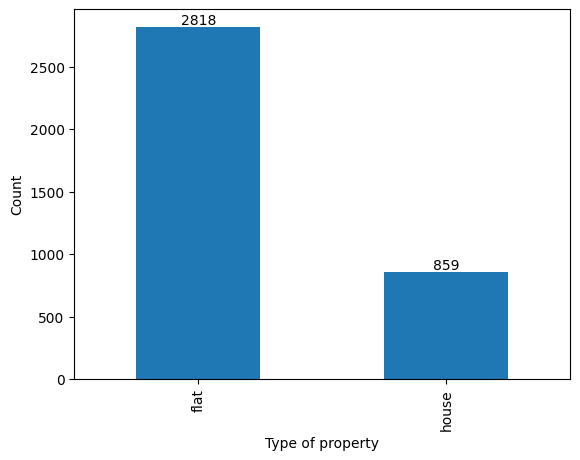

In [11]:
temp = df['property_type'].value_counts()
temp.plot(kind='bar')
plt.xlabel('Type of property')
plt.ylabel('Count')
for i,v in enumerate(temp):
    plt.text(i,v+20,str(v),ha='center')

Flats as a property type is around 70% while property type house is rest 30%

In [12]:
df['society'].value_counts()

independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
park view apartments                      1
kamroon court                             1
meditech apartment                        1
ompee k s residency                       1
huda housing board society                1
Name: society, Length: 675, dtype: int64

In [13]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
puri emerald bay                        0.490596
ansal heights 86                        0.494671
ats kocoon                              0.498746
central park flower valley              0.502508
ireo the corridors                      0.506270
Name: society, Length: 75, dtype: float64

<AxesSubplot:>

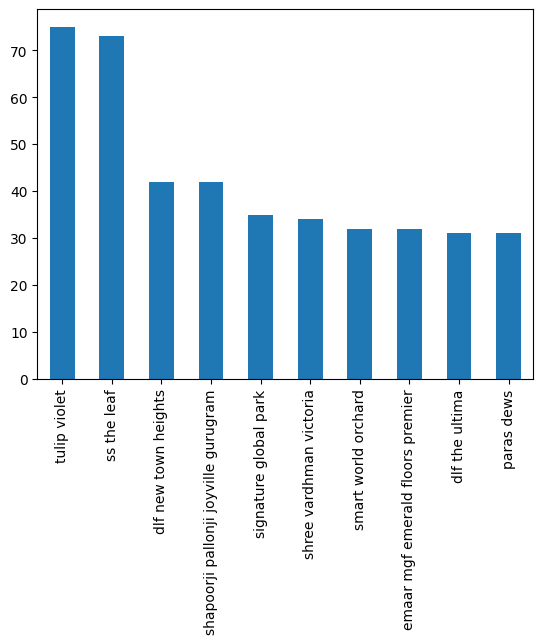

In [14]:
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar')

### Sector

<AxesSubplot:>

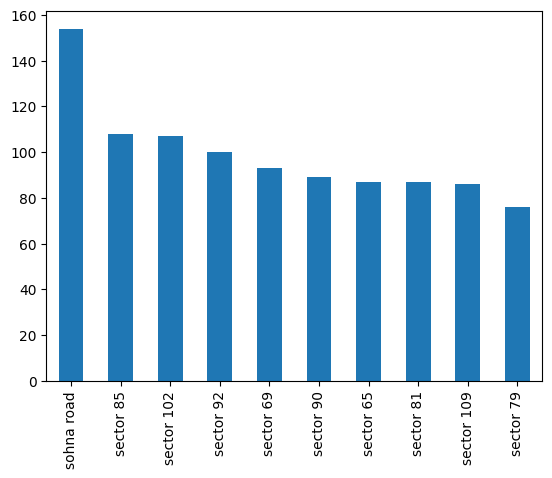

In [15]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [16]:
a = df['sector'].value_counts()

VeryHigh = a[a>100].count()
High = a[(a>50) & (a<100)].count()
Average = a[(a>10) & (a<49)].count()
Low = a[(a>2) & (a<9)].count()
VeryLow = a[a==1].count()

print('No. of sectors with very high frequency',VeryHigh)
print('No. of sectors with high frequency',High)
print('No. of sectors with average frequency',Average)
print('No. of sectors with low frequency',Low)
print('No. of sectors with very low frequency',VeryLow)

No. of sectors with very high frequency 3
No. of sectors with high frequency 22
No. of sectors with average frequency 58
No. of sectors with low frequency 20
No. of sectors with very low frequency 1


In [17]:
df['sector'].value_counts()

sohna road    154
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 17a      3
sector 27       3
sector 17b      3
sector 73       3
sector 37       1
Name: sector, Length: 113, dtype: int64

Observations:
1. 113 unique sectors
2. Frequency of sectors:
    No. of sectors with very high frequency (>100) 3
    No. of sectors with high frequency (50-100) 22
    No. of sectors with average frequency (10-49) 58
    No. of sectors with low frequency (2-9) 20
    No. of sectors with very low frequency (=1) 1

### Price

In [18]:
df['price'].isnull().sum()

17

In [19]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

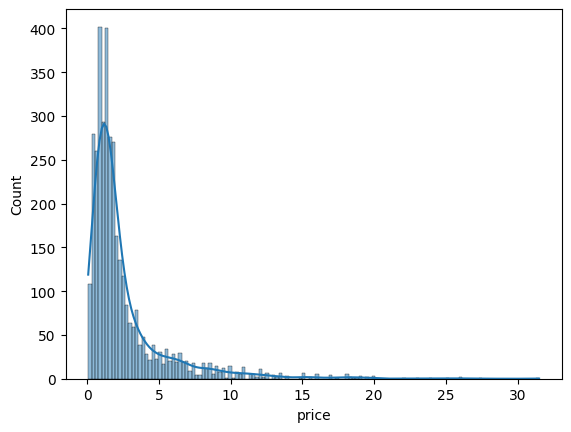

In [20]:
sns.histplot(data=df['price'],kde=True)

<AxesSubplot:xlabel='price'>

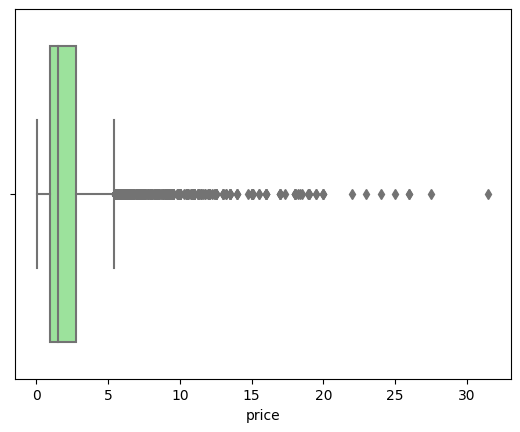

In [21]:
sns.boxplot(x=df['price'],color='lightgreen')

Descriptive statistics
  1. Count: There are 3660 non null values
  2. Mean price: The average price is approx 2.5 crores
  3. Median price: The median or 50percentile is 1.5 crores
  4. Standard Deviation: The prices have a standard deviation of 2.98 crores indicating outliers
  5. Range: flats ranges from 0.07 crorex to 31.5 crores
  6. IQR: The interquartile range (difference b/w 75th and 25th percentile) is from 0.95 crores to 2.75 crores

Visualizations
  1. Histogram indicates that most of the properties are priced in the lower range (below 5 crores) with a few properties going beyond 10 crores
  2. Box plot shows the spread of the data and potential outliers. properties priced above 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

Missing values
  There are 17 missing values in the price column

In [22]:
skewness = df['price'].skew()
kurtosis = df['price'].kurtosis()

print('Skewness in data is:',skewness)
print('Kurtosis in data is:',kurtosis)

Skewness in data is: 3.2791704733134623
Kurtosis in data is: 14.933372629214258


##### Skewness:
The values of skewness is approximately 3.28 on a positive side, that means the price is skewed on the right side which implies more number of flats are priced on the lower side and few on the higher side

##### Kurtosis:
Tells the heaviness of the tail. A values more than 3 is considered to be heavy tail distribution. That means more outliers are present as compared to the normal distribution

In [23]:
df['price'].quantile([0.01,0.05,0.5,0.90,0.99])

0.01     0.250
0.05     0.370
0.50     1.520
0.90     5.910
0.99    15.264
Name: price, dtype: float64

##### Quantile Analysis
    1% of flats lies below 25 lacs
    5% properties lie below 37 lacs
    95% of properties lies below 1.5 crores
    99% of properties lies below 15.26 crores

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

1.8


In [25]:
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print(lower)
print(upper)

-1.7500000000000002
5.45


In [26]:
outliers = df[(df['price']<lower) | (df['price']>upper)]
outliers.shape

(425, 23)

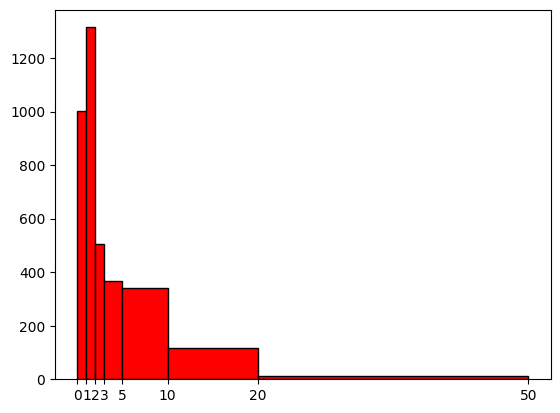

In [27]:
plt.hist(df['price'],bins=[0,1,2,3,5,10,20,50],edgecolor='black',color='red')
plt.xticks([0,1,2,3,5,10,20,50])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

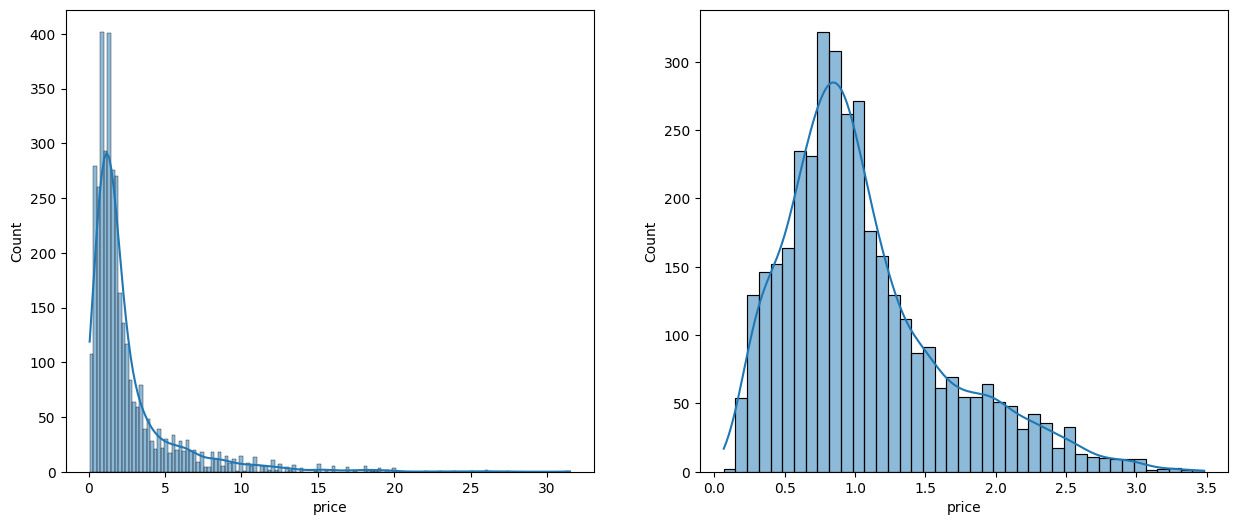

In [38]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df['price'],kde=True)


plt.subplot(1,2,2)
log_price = np.log1p(df['price'])
sns.histplot(data=log_price,kde=True)

<AxesSubplot:xlabel='price'>

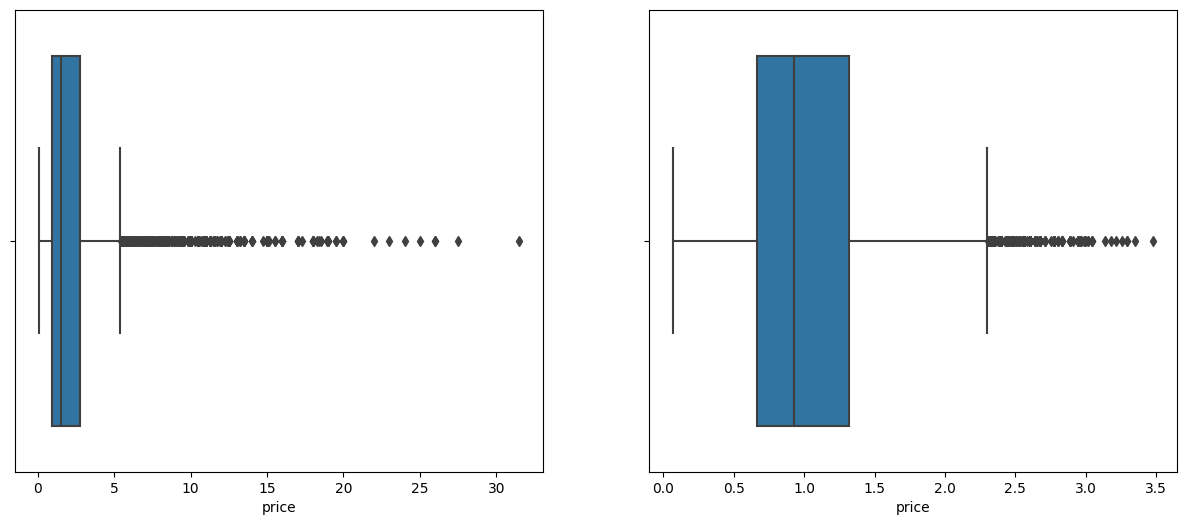

In [39]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=df['price'])


plt.subplot(1,2,2)
log_price = np.log1p(df['price'])
sns.boxplot(x=log_price)

#### price_per_sqft

In [41]:
df['price_per_sqft'].isnull().sum()

17

In [42]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

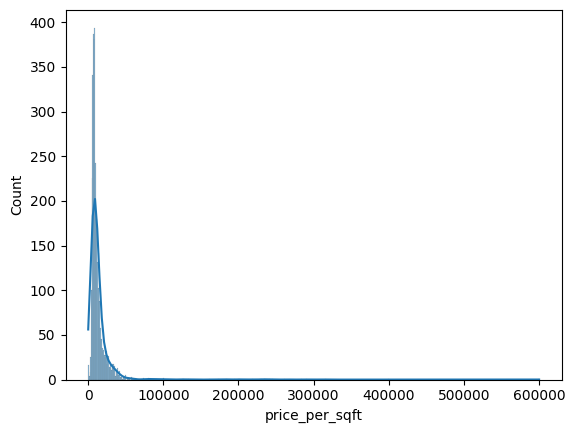

In [43]:
 sns.histplot(df['price_per_sqft'],kde=True)

<AxesSubplot:xlabel='price_per_sqft'>

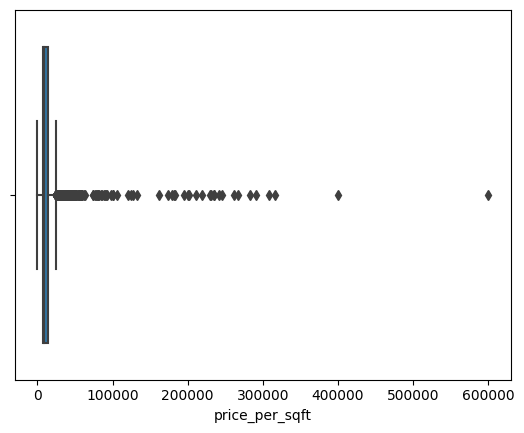

In [44]:
sns.boxplot(x = df['price_per_sqft'])

The box plot clearly shows several outliers on the higher side. IQR is relatively compact, but there are many data points that lie beyond the whisker which are potential outliers.

##### observations
    Potential outliers
    Right skewed
    17 missing values

#### Bedroom

In [46]:
df['bedRoom'].isnull().sum()

0

In [47]:
df['bedRoom'].value_counts()

3     1496
2      942
4      660
5      210
1      124
6       74
9       41
8       30
12      28
7       28
10      20
16      12
13       4
18       2
19       2
20       1
11       1
14       1
21       1
Name: bedRoom, dtype: int64

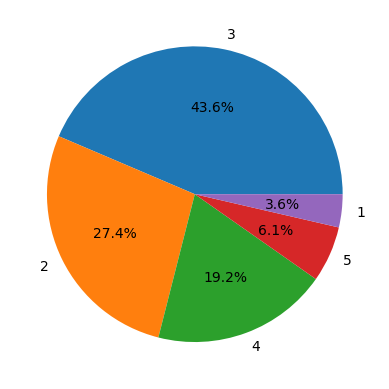

In [59]:
plt.pie(df['bedRoom'].value_counts(normalize=True).head(5),autopct='%0.1f%%',labels=df['bedRoom'].value_counts().head().index)
plt.show()

#### Bathroom

In [61]:
df['bathroom'].value_counts()

3     1077
2     1047
4      820
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
18       4
13       4
11       4
17       3
20       3
14       2
21       1
Name: bathroom, dtype: int64

<AxesSubplot:>

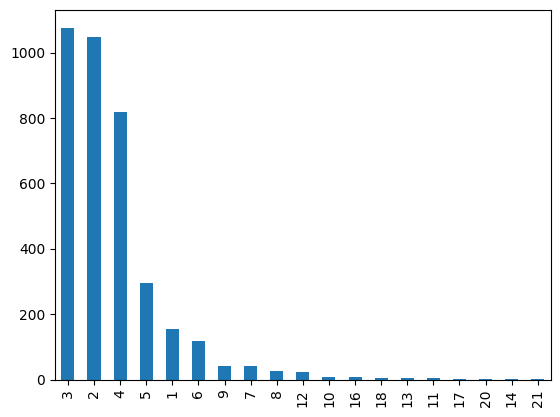

In [67]:
df['bathroom'].value_counts().plot(kind='bar')

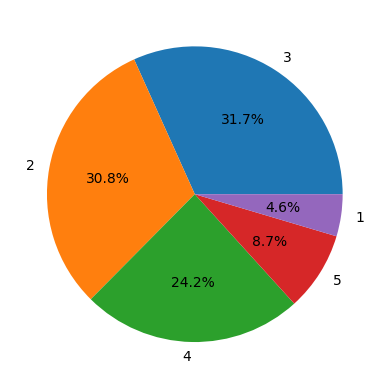

In [68]:
plt.pie(df['bathroom'].value_counts(normalize=True).head(5),autopct='%0.1f%%',labels=df['bathroom'].value_counts().head().index)
plt.show()

#### Balcony

In [71]:
df['balcony'].value_counts()

3+    1172
3     1074
2      884
1      365
0       96
No      86
Name: balcony, dtype: int64

In [72]:
df['balcony'].isnull().sum()

0

<AxesSubplot:xlabel='balcony', ylabel='Count'>

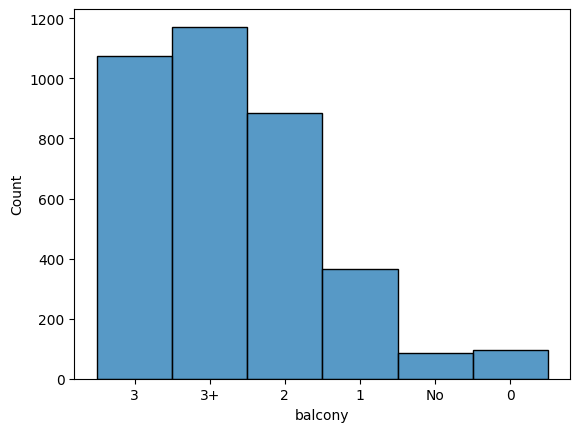

In [78]:
sns.histplot(x=df['balcony'])

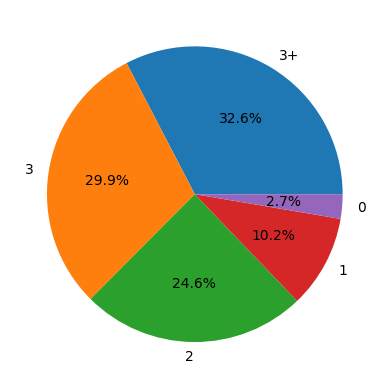

In [79]:
plt.pie(df['balcony'].value_counts(normalize=True).head(5),autopct='%0.1f%%',labels=df['balcony'].value_counts().head().index)
plt.show()

#### floor number

In [83]:
df['floorNum'].value_counts()

3.0     498
2.0     493
1.0     351
4.0     316
8.0     195
6.0     183
10.0    179
7.0     176
5.0     169
9.0     161
12.0    158
0.0     129
11.0    113
14.0    112
15.0     80
16.0     52
17.0     46
13.0     42
18.0     36
19.0     33
20.0     26
21.0     16
23.0     14
22.0     13
24.0     11
25.0      9
27.0      8
30.0      5
26.0      5
28.0      4
33.0      4
29.0      3
31.0      3
34.0      2
39.0      2
32.0      2
43.0      2
35.0      2
40.0      1
51.0      1
44.0      1
38.0      1
45.0      1
Name: floorNum, dtype: int64

In [84]:
df['floorNum'].isnull().sum()

19

In [85]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<AxesSubplot:>

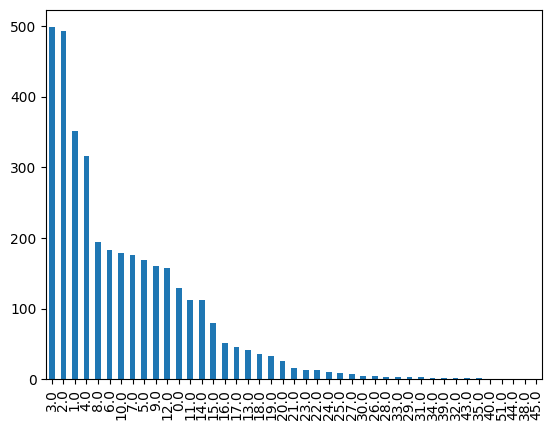

In [95]:
df['floorNum'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='floorNum'>

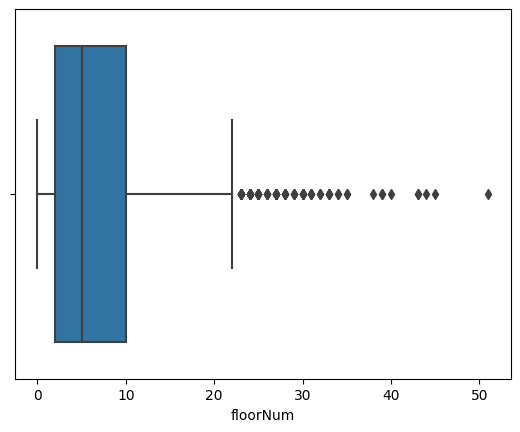

In [97]:
sns.boxplot(x=df['floorNum'])

1. Majority of the properties has Ground floor(0) to 20th floor
2. Floors 1,2,3,4 are most common with 3 floors being the most common
3. Few properties has high number of floors like 40 floors to 50 floors
4. Box plot indicates that majority of the properties lie between 3rd floor to 10 floors. 
5. Data points beyond the whiskers esp on the right side are potential outliers

#### Facing

In [98]:
df['facing'].isnull().sum()

1045

In [99]:
df['facing'].fillna('NA',inplace=True)

In [100]:
df['facing'].value_counts()

NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

#### Age possession

In [101]:
df['agePossession'].isnull().sum()

0

In [102]:
df['agePossession'].value_counts()

Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: agePossession, dtype: int64

#### Super Built-up area

In [103]:
df['super_built_up_area'].value_counts()

1950.00    37
1650.00    37
1578.00    25
2000.00    25
1640.00    22
           ..
2352.00     1
2176.00     1
525.00      1
2182.00     1
2015.58     1
Name: super_built_up_area, Length: 593, dtype: int64

In [104]:
df['super_built_up_area'].isnull().sum()

1802

In [105]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot:xlabel='super_built_up_area', ylabel='Count'>

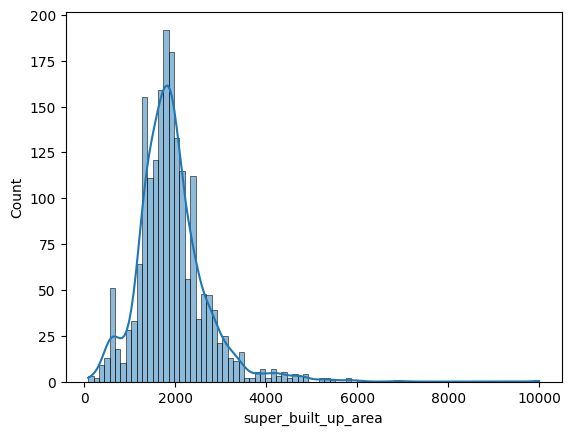

In [106]:
sns.histplot(df['super_built_up_area'],kde=True)

<AxesSubplot:xlabel='super_built_up_area'>

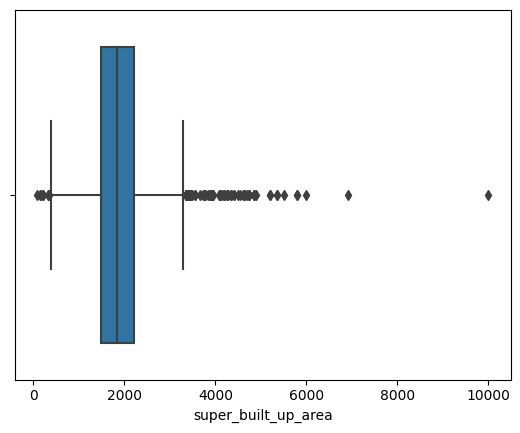

In [107]:
sns.boxplot(x=df['super_built_up_area'])

##### Observations:
1. Most of the flats has super built up area ranges from 1000sqft to 2500 sqft
2. Distribution is right skewed that indicates there are few properties which has larger area
3. There are several data points that lie beyond the whiskers which  are potential outliers.

#### Built-up area

In [109]:
df['built_up_area'].value_counts()

1800.0    41
3240.0    37
1900.0    34
2700.0    33
1350.0    33
          ..
1556.0     1
2570.0     1
1009.0     1
1383.0     1
763.0      1
Name: built_up_area, Length: 644, dtype: int64

In [110]:
df['built_up_area'].isnull().sum()

1987

In [111]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<AxesSubplot:xlabel='built_up_area', ylabel='Count'>

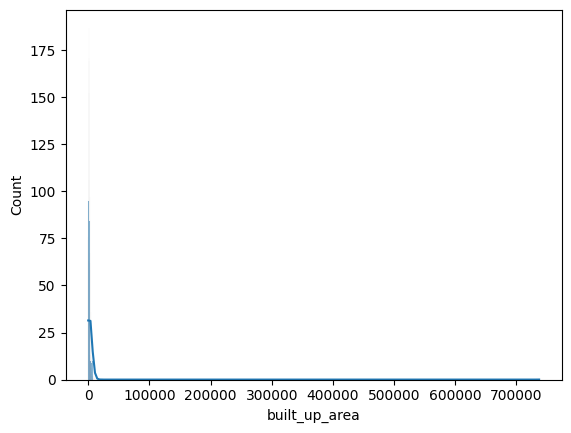

In [112]:
sns.histplot(df['built_up_area'],kde=True)

<AxesSubplot:xlabel='built_up_area'>

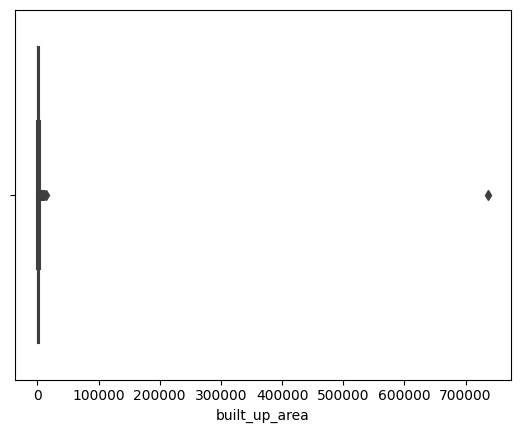

In [113]:
sns.boxplot(x=df['built_up_area'])

##### Observations
1. Most properties have built up area ranging from 500sqft to 4000sqft
2. Distribution plot shows that data is higly right skewed due to the presence of few properties with very large area
3. Bos plot confirms the presence of outliers. IQR is highly compact.

Presence of extreme outliers on the right side of the data could be due to wrong calculations or there could be properties with exceptionally large built up area like a shopping mall etc

#### Carpet area

In [114]:
df['carpet_area'].isnull().sum()

1805

In [117]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<AxesSubplot:xlabel='carpet_area', ylabel='Count'>

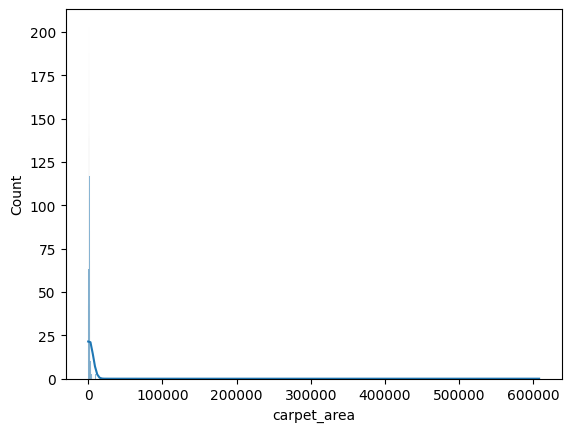

In [115]:
sns.histplot(df['carpet_area'],kde=True)

<AxesSubplot:xlabel='carpet_area'>

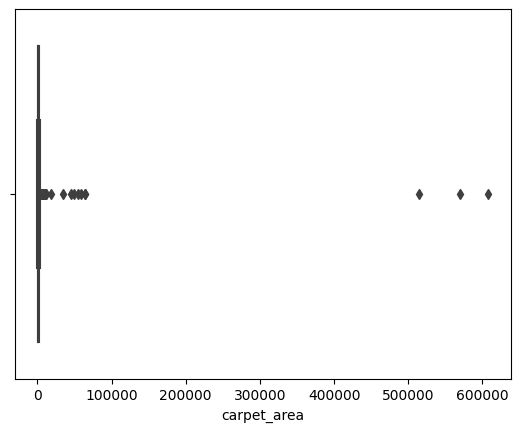

In [116]:
sns.boxplot(x=df['carpet_area'])

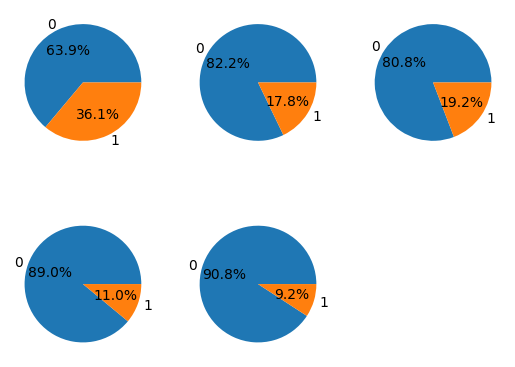

In [131]:
col = ['servant room','pooja room','study room','others','store room']

for i,val in enumerate(col,start=1):
    plt.subplot(2,3,i)
    plt.pie(df[val].value_counts(),labels=df[val].value_counts().index,autopct='%0.1f%%')

#### Furnishing type

In [133]:
df['furnishing_type'].isnull().sum()

0

In [134]:
df['furnishing_type'].value_counts()

0    2411
1    1058
2     208
Name: furnishing_type, dtype: int64

<AxesSubplot:ylabel='furnishing_type'>

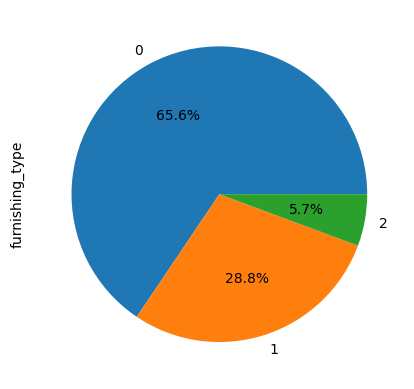

In [135]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### Luxury Store

In [137]:
df['luxury_score'].value_counts()

0      457
53     291
224     94
228     74
48      54
      ... 
13       3
221      2
4        2
183      2
220      1
Name: luxury_score, Length: 222, dtype: int64

In [138]:
df['luxury_score'].isnull().sum()

0

In [139]:
df['luxury_score'].describe()

count    3677.000000
mean       89.463421
std        68.785169
min         0.000000
25%        39.000000
50%        70.000000
75%       140.000000
max       228.000000
Name: luxury_score, dtype: float64

<AxesSubplot:xlabel='luxury_score', ylabel='Count'>

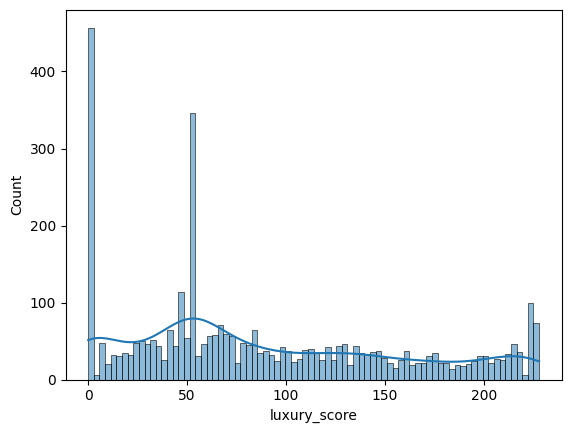

In [148]:
sns.histplot(data=df['luxury_score'],kde=True,bins=80)

<AxesSubplot:xlabel='luxury_score'>

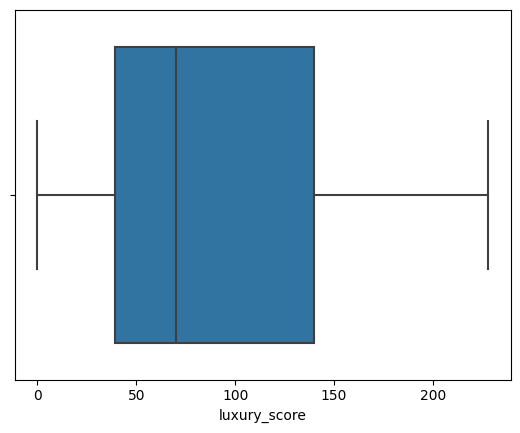

In [145]:
sns.boxplot(x=df['luxury_score'])

The histogram plot shows a multi peak distribution. Significant number of properties has a luxury score ranging between 0-75 and 110-150. Box plot shows that majority of properties has a luxury score ranging 40-130 and no potential outliers were observed.